# Loan Prediction Using Logistic Regression

### Importing packages

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Loading Datasets

In [2]:
data = pd.read_csv('loan_dataset.csv')
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isnull().sum().sort_values(ascending=False)

Credit_History        50
Self_Employed         32
Loan_Amount           22
Dependents            15
Loan_Amount_Term      14
Gender                13
Married                3
Loan_ID                0
Education              0
Applicant_Income       0
Coapplicant_Income     0
Property_Area          0
Loan_Status            0
dtype: int64

### Data Cleaning

#### Replacing Null Values With Most_Frequent

In [7]:
from sklearn.impute import SimpleImputer
SI = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# replacing categorical values(Null) with most_frequent values 
data[['Gender']] = SI.fit_transform(data[['Gender']])
data[['Self_Employed']] = SI.fit_transform(data[['Self_Employed']])
data[['Dependents']] = SI.fit_transform(data[['Dependents']])
data[['Married']] = SI.fit_transform(data[['Married']])

#### Filling Null Values With Mean Values

In [8]:
# replacing numerical values(Null) with mean values
SI = SimpleImputer(missing_values=np.nan, strategy='mean')
data[['Loan_Amount']] = SI.fit_transform(data[['Loan_Amount']])
data[['Loan_Amount_Term']] = SI.fit_transform(data[['Loan_Amount_Term']])
data[['Credit_History']] = SI.fit_transform(data[['Credit_History']])

In [9]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#### Convert String Value

In [10]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [11]:
# convert string values into numerical values for categorical_value
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
data['Loan_ID'] = Le.fit_transform(data['Loan_ID'])
data['Gender'] = Le.fit_transform(data['Gender'])
data['Married'] = Le.fit_transform(data['Married'])
data['Dependents'] = Le.fit_transform(data['Dependents'])
data['Education'] = Le.fit_transform(data['Education'])
data['Self_Employed'] = Le.fit_transform(data['Self_Employed'])
data['Property_Area'] = Le.fit_transform(data['Property_Area'])

In [12]:
data.dtypes

Loan_ID                 int32
Gender                  int32
Married                 int32
Dependents              int32
Education               int32
Self_Employed           int32
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area           int32
Loan_Status            object
dtype: object

In [13]:
data = data.drop(columns='Loan_ID')

In [14]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y


### Exploratory Data Analysis (EDA)

In [15]:
# importing packges
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Plotting Gender

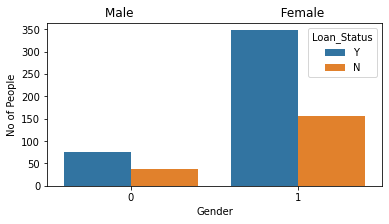

In [16]:
plt.figure(figsize=(6,3))
sns.countplot(x='Gender', data=data, hue=data['Loan_Status'])
plt.title('Male                                      Female')
plt.ylabel('No of People')
plt.show()

##### Plotting Married

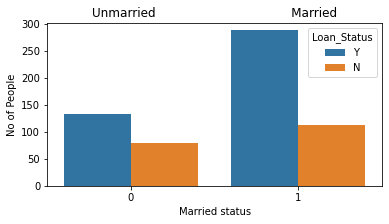

In [17]:
plt.figure(figsize=(6,3))
sns.countplot(x='Married', data=data, hue=data['Loan_Status'])
plt.title('Unmarried                                   Married')
plt.xlabel('Married status')
plt.ylabel('No of People')
plt.show()

##### Plotting Dependents

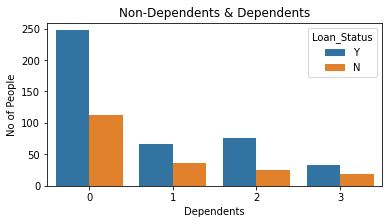

In [18]:
plt.figure(figsize=(6,3))
sns.countplot(x='Dependents', data=data, hue=data['Loan_Status'])
plt.title('Non-Dependents & Dependents')
plt.ylabel('No of People')
plt.show()

##### Plotting Education

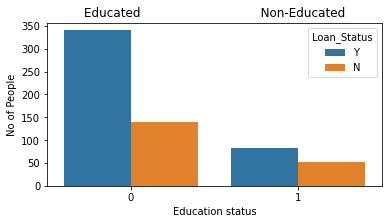

In [19]:
plt.figure(figsize=(6,3))
sns.countplot(x='Education', data=data, hue=data['Loan_Status'])
plt.title('Educated                               Non-Educated')
plt.xlabel('Education status')
plt.ylabel('No of People')
plt.show()

##### Plotting Self Employed

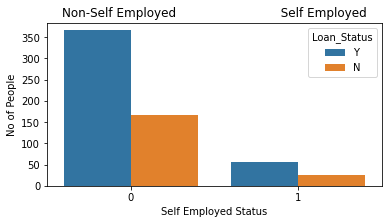

In [20]:
plt.figure(figsize=(6,3))
sns.countplot(x='Self_Employed', data=data, hue=data['Loan_Status'])
plt.title('Non-Self Employed                           Self Employed')
plt.xlabel('Self Employed Status')
plt.ylabel('No of People')
plt.show()

##### Plotting Applicant_Income

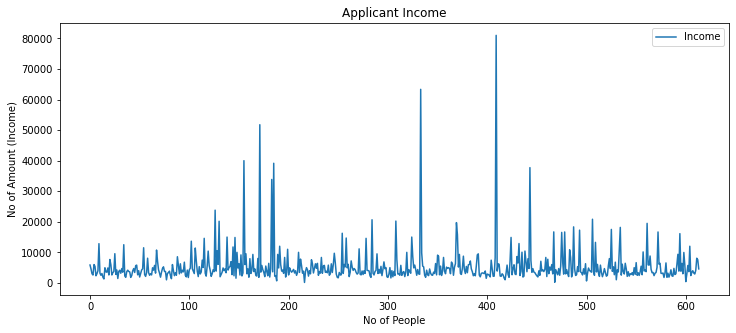

In [21]:
plt.figure(figsize=(12,5))

plt.plot(data.Applicant_Income, label='Income')
plt.xlabel('No of People')
plt.ylabel('No of Amount (Income)')
plt.title('Applicant Income')
plt.legend()
plt.show()

##### Plotting Co-Applicant Income

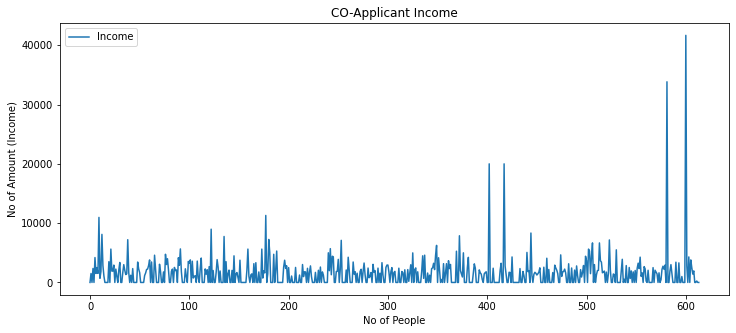

In [22]:
plt.figure(figsize=(12,5))
plt.plot(data.Coapplicant_Income, label='Income')
plt.xlabel('No of People')
plt.ylabel('No of Amount (Income)')
plt.title('CO-Applicant Income')
plt.legend()
plt.show()

##### Plotting Property Area

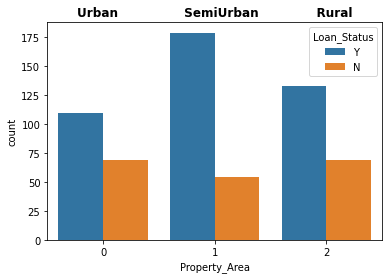

In [23]:
sns.countplot(data.Property_Area, hue=data['Loan_Status'])
plt.title('Urban                SemiUrban              Rural',fontdict={'fontweight':'bold', 'fontsize': '12'})
plt.show()

### Model Selection

In [24]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [25]:
# standard scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Model Training

In [27]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=120, solver= 'liblinear', multi_class='auto', verbose=0)
model = LR.fit(X_train, y_train)

In [28]:
y_pred = model.predict(X_test)

### Accuracy of Our Model

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
score = accuracy_score(y_pred, y_test)
print(f'Accuracy of Our Model: {score}')
model.score(X_test, y_test)

Accuracy of Our Model: 0.8292682926829268


0.8292682926829268

### Confusion Matrix

In [30]:
matrix = confusion_matrix(y_pred, y_test)

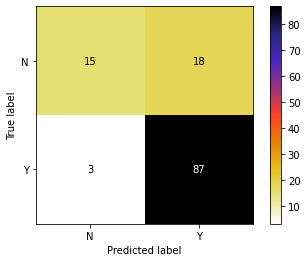

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_test, y_test, cmap='CMRmap_r')
plt.show()

In [32]:
# adding prediction value to dataset
prediction = pd.DataFrame(y_pred, columns=['Prediction'])
data = pd.concat([data, prediction], axis=1)

In [33]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Prediction
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N,Y
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y,Y


## Using DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, random_state=45,
            max_leaf_nodes=5, splitter='random', min_samples_split=5)

In [35]:
Classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5,
                       min_samples_split=5, random_state=45, splitter='random')

In [36]:
pred = Classifier.predict(X_test)

In [37]:
Classifier.score(X_test, y_test)

0.8292682926829268

In [38]:
confusion_matrix(pred, y_test)

array([[14,  2],
       [19, 88]], dtype=int64)

## Using RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=5, max_samples=100, random_state=5,
                                    min_impurity_decrease=0, max_leaf_nodes=5)

In [40]:
Classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=5,
                       max_samples=100, min_impurity_decrease=0,
                       n_estimators=10, random_state=5)

In [41]:
y_pred = Classifier.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
score = Classifier.score(X_test, y_test)
print(score)
result = confusion_matrix(y_pred, y_test)
print(result)
result1 = classification_report(y_pred, y_test)
print(result1)

0.8292682926829268
[[14  2]
 [19 88]]
              precision    recall  f1-score   support

           N       0.42      0.88      0.57        16
           Y       0.98      0.82      0.89       107

    accuracy                           0.83       123
   macro avg       0.70      0.85      0.73       123
weighted avg       0.91      0.83      0.85       123



In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[18 15]
 [10 80]]
Classification Report:
              precision    recall  f1-score   support

           N       0.64      0.55      0.59        33
           Y       0.84      0.89      0.86        90

    accuracy                           0.80       123
   macro avg       0.74      0.72      0.73       123
weighted avg       0.79      0.80      0.79       123

Accuracy: 0.7967479674796748
